# Lab 3 - Security Data Science

In [1]:
import pefile
import os
import pandas as pd

## Parte 1. Creacion del Dataset

In [18]:
file_name=['1F2EB7B090018D975E6D9B40868C94CA','B07322743778B5868475DBE66EEDAC4F','GBV66_8F259BB36E00D124963CFA9B86F502E','POL55_A4F1ECC4D25B33395196B5D51A06790','33DE5067A433A6EC5C328067DC18EC37','B98hX8E8622C393D7E832D39E620EAD5D3B49','GFT4_7DDD3D72EAD03C7518F5D47650C8572',   'QW2_4C6BDDCCA2695D6202DF38708E14FC7E','65018CD542145A3792BA09985734C12A','BVJ2D9FBF759F527AF373E34673DC3ACA462','HJGQDD892986B2249B5214639ECC8AC0223',  'RTC_7F85D7F628CE62D1D8F7B39D8940472','650A6FCA433EE243391E4B4C11F09438','DS22_A670D13D4D014169C4080328B8FEB86','JH78C0A33A1B472A8C16123FD696A5CE5EBB','SAM_B659D71AE168E774FAAF38DB30F4A84','6FAA4740F99408D4D2DDDD0B09BBDEFD','EEE99EC8AA67B05407C01094184C33D2B5A44','JKK8CA6FE7A1315AF5AFEAC2961460A80569','785003A405BC7A4EBCBB21DDB757BF3F','F6655E39465C2FF5B016980D918EA028','K99_C3A9A7B026BFE0E55FF219FD6AA7D94',    'TG78Z__727A6800991EEAD454E53E8AF164A99C','8442AE37B91F279A9F06DE4C60B286A3','F8437E44748D2C3FCF84019766F4E6DC','KLp90_6D5C8FC4B14559F73B6136D85B94198','VBMM9_149B7BD7218AAB4E257D28469FDDB0D','99A39866A657A10949FCB6D634BB30D5','FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2','L11_1415EB8519D13328091CC5C76A624E3D','VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E','A316D5AECA269CA865077E7FFF356E7D','FGTR43_EF8E0FB20E7228C7492CCDC59D87C690','NBV_8B75BCBFF174C25A0161F30758509A44','AAAz2E1B6940985A23E5639450F8391820655','FHHH6576C196385407B0F7F4B1B537D88983','NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4','AL65_DB05DF0498B59B42A8E493CF3C10C578','FTTR9EA3C16194CE354C244C1B74C46CD92E','PL98_BD8B082B7711BC980252F988BB0CA936']

malware = []

In [20]:
for file in file_name:
    file_dictionary = {}
    path = os.path.dirname(file)
    path = path + 'MALWR/'
    pe = pefile.PE(path + file)

    for section in pe.sections:
        section_split = str(section.Name).split("'")
        x = "\\"
        section_name = section_split[1].split(x)
        key = section_name[0]
        file_dictionary[key] = 1
        file_dictionary[key + '_virtual_address'] = section.VirtualAddress
        file_dictionary[key + '_virtual_size'] = section.Misc_VirtualSize
        file_dictionary[key + '_size_raw_data'] = section.SizeOfRawData
        
    for entry in pe.DIRECTORY_ENTRY_IMPORT:
        file_dictionary[entry.dll] = 1
        for function in entry.imports:  
            file_dictionary[function.name] = 1
    
    malware.append(file_dictionary)

df = pd.DataFrame(malware)

df.to_csv('New_Dataset.csv', index=False)

## Parte 2. Implementación del modelo

In [23]:
df.head(5)

,UPX0,UPX0_virtual_address,UPX0_virtual_size,UPX0_size_raw_data,UPX1,UPX1_virtual_address,UPX1_virtual_size,UPX1_size_raw_data,.rsrc,.rsrc_virtual_address,...,b'StartServiceA',b'QueryServiceStatus',b'RegisterServiceCtrlHandlerA',b'SetServiceStatus',b'StartServiceCtrlDispatcherA',b'printf',b'WSASetLastError',b'ShellExecuteA',b'ntdll.dll',b'WSAGetLastError'
0,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,3584.0,1.0,28672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,3584.0,1.0,28672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,4096.0,1.0,28672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 157 entries, UPX0 to b'WSAGetLastError'
dtypes: float64(155), int64(2)
memory usage: 49.2 KB


In [34]:
df.fillna(value = 0, inplace = True)

In [35]:
df.head()

,UPX0,UPX0_virtual_address,UPX0_virtual_size,UPX0_size_raw_data,UPX1,UPX1_virtual_address,UPX1_virtual_size,UPX1_size_raw_data,.rsrc,.rsrc_virtual_address,...,b'StartServiceA',b'QueryServiceStatus',b'RegisterServiceCtrlHandlerA',b'SetServiceStatus',b'StartServiceCtrlDispatcherA',b'printf',b'WSASetLastError',b'ShellExecuteA',b'ntdll.dll',b'WSAGetLastError'
0,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,3584.0,1.0,28672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,3584.0,1.0,28672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4096.0,20480.0,0.0,1.0,24576.0,4096.0,4096.0,1.0,28672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2. Implementación del modelo

In [36]:
!pip install kneed

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes', 'str']. An error will be raised in 1.2.
  warnings.warn(


/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/935257218.py:3: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/935257218.py:3: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/935257218.py:3: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/935257218.py:3: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possi

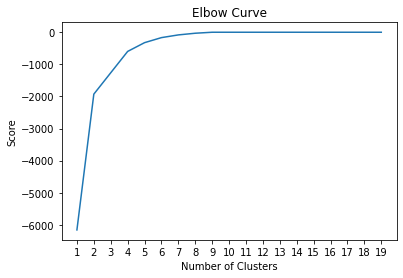

In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(Nc, Nc)
plt.show()

Se puede observar que la grafica del codo indica usar 5 clusters

In [43]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [45]:
clusters = DBSCAN(eps = 0.005, min_samples = 2).fit(X)

In [46]:
clusters.labels_

array([ 0,  0,  1,  1,  2, -1, -1,  3,  2,  2,  2,  4,  2,  1,  2,  1,  2,
        0,  2,  2,  0,  1,  5,  0,  2,  1,  4,  2,  2,  4,  5,  2,  3,  2,
        6,  2,  1,  6,  0,  6])

In [72]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range (2, kmax+1):
    kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(X)
    etiquetas = kmeans.labels_
    sil.append(silhouette_score(X, etiquetas, metric = 'euclidean'))

/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/1467758647.py:13: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  ).fit(X)
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/1467758647.py:13: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  ).fit(X)
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/1467758647.py:13: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  ).fit(X)
/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_34535/1467758647.py:13: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  ).fit(X)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


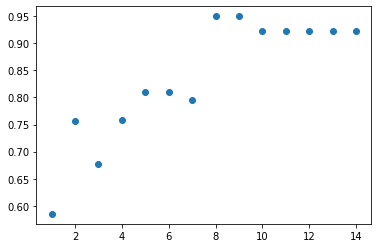

In [73]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
print(k)
 
plt.scatter(k, sil)

In [74]:
print(sil)

[0.5850438552238554, 0.7572117451799683, 0.6771496520567286, 0.7589530564104795, 0.8094787416438856, 0.8092198830003701, 0.795944393259964, 0.9499841478249904, 0.9497252978719756, 0.9221767275228568, 0.9221767275228568, 0.9221767275228568, 0.9221767275228568, 0.9221767275228568]


# Conclusión 

* **¿Para qué número de clústeres se obtiene el coeficiente de sillhouete más alto?** 8 y 9 clusters.
* **¿Coincide con el método del codo?** No, el metodo del codo indica 5.
* **¿Cuántas familias existen entre los ejemplares de malware proporcionados?** Se obtuvieron 9 familias diferentes.